#Gradio + HuggingFace Spaces: A Tutorial


Based on Dr. Tanishq Abraham's [blog](https://www.tanishq.ai/blog/posts/2021-11-16-gradio-huggingface.html) implement is it bird, plane or Superman on Gradio.

##Install Gradio
Installation of Gradio work around taken from [here](https://discuss.huggingface.co/t/how-to-solve-this-problem-i-cant-implement-gradio/63706)

In [ ]:
!pip install -q gradio==3.45.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account a

In [ ]:
import gradio as gr

##Install and import Fast.ai

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *

##Using Gradio

Ensure follow of `02c_is-it-a-bird-plane-superman-with-cleaning-augmentation-and-export.ipyn` are upload to root drive of this Colab:


*   `model.pkl`
*   hummingbird.jpg
*   f16.jpg
*   superman.jpeg

If you have different example images, please upload accordingly and do change the `examples` list with the corresponding image files name.






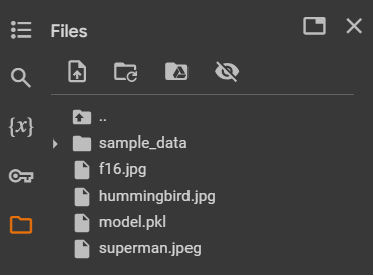

In [ ]:
learn = load_learner('model.pkl')

In [ ]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [ ]:
title = "Is it a bird, a plane or Superman Classifier"
description = "This classifier trained on the web crawled images dataset of birds, F16 and Superman with fastai. Created as a demo for Gradio and HuggingFace Spaces."
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Dr. Tanishq Abraham Blog post</a></p>"
examples = ['hummingbird.jpg', 'f16.jpg', 'superman.jpeg'] # change these example images if you have different ones
interpretation='default'
enable_queue=True

gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,article=article,examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch()

<ipython-input-7-bfc170127871>:8: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,article=article,examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch()
<ipython-input-7-bfc170127871>:8: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,article=article,examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch()
<ipython-input-7-bfc170127871>:8: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  gr.

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>